![title](Header__0009_1.png "Header")
___
# Chapter 1 - Data Munging Basics
## Segment 5 - Grouping and data aggregation

In [1]:
# Importing various packages for our notebook.
import numpy as np # For matrix-manipulation.
import pandas as pd # For dealing with the dataset.
from pandas import Series, DataFrame

### Grouping data by column index

In [2]:
# Importing the dataset from the file 'mtcars.csv' to the Pandas DataFrame.
cars = pd.read_csv(r'mtcars.csv')

# Printing the first five records of the DataFrame.
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4
2,Datsun 710,NaN,4,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1
3,Hornet 4 Drive,21.4,6,258.0,NaN,3.08,3.215,19.44,1.0,0.0,3.0,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0.0,0.0,NaN,2


In [3]:
# Renaming the columns of the DataFrame as below:
cars.columns = ['vichle_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'v_Shape', 'am', 'gear', 'carb']

In [4]:
# Checking the dataset by displaying the first three head rows.
cars.head(3)

,vichle_names,mpg,cyl,disp,hp,drat,wt,qsec,v_Shape,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4
2,Datsun 710,NaN,4,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1


In [5]:
# Importing the cars table into a dataframe named DF.
DF = pd.DataFrame(cars)

In [6]:
# Checking the dataset by displaying the first five head rows.
DF.head()

,vichle_names,mpg,cyl,disp,hp,drat,wt,qsec,v_Shape,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4
2,Datsun 710,NaN,4,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1
3,Hornet 4 Drive,21.4,6,258.0,NaN,3.08,3.215,19.44,1.0,0.0,3.0,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0.0,0.0,NaN,2


In [7]:
# What is the dimension of your data frame - (rows, columns)
DF.shape

(32, 12)

In [8]:
# Describe the DataFrame's various descriptive parameters.
DF.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,v_Shape,am,gear,carb
count,30.000000,32.000000,32.000000,31.000000,31.000000,32.000000,29.000000,30.000000,28.000000,29.000000,32.0000
mean,20.076667,6.187500,230.721875,147.870968,3.609032,3.217250,17.601379,0.433333,0.428571,3.724138,2.8125
std,6.196366,1.785922,123.938694,69.363171,0.538766,0.978457,1.535459,0.504007,0.503953,0.751026,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.275000,4.000000,120.825000,96.000000,3.080000,2.581250,16.870000,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.700000,3.325000,17.420000,0.000000,0.000000,4.000000,2.0000
75%,22.475000,8.000000,326.000000,180.000000,3.920000,3.610000,18.610000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,20.010000,1.000000,1.000000,5.000000,8.0000


In [9]:
# Checking various columns present in the original DataFrame.
cars.columns

Index(['vichle_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec',
       'v_Shape', 'am', 'gear', 'carb'],
      dtype='object')

# Data Filtering:

In [10]:
# Checks the number of NAN values in the dataset.
cars.isnull().sum()

vichle_names    0
mpg             2
cyl             0
disp            0
hp              1
drat            1
wt              0
qsec            3
v_Shape         2
am              4
gear            3
carb            0
dtype: int64

# Replacing the NAN values with the mean.

### Replacing the missing values with the most repeated value in that column

## Syntax: object_name.groupby('Series_name')
## ♔┈♔┈♔┈( The groupby function in Pandas DataFrame groups the data in order to execute functions and operations on it. )┈♔┈♔┈♔

### Another Definition: To group a DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame,
### and then pass in the column Series you want the DataFrame to be grouped by.

In [11]:
# Adds a column 'cyl' to calculate the mean easily.
cars_groups = cars.groupby(cars['cyl'])

# Calculates the average values of the data.
cars_groups.mean()

C:\Users\Ratch\AppData\Local\Temp\ipykernel_23708\2919163236.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cars_groups.mean()


,mpg,disp,hp,drat,wt,qsec,v_Shape,am,gear,carb
cyl,,,,,,,,,,
4,27.050000,105.136364,82.636364,4.070909,2.285727,18.761000,0.900000,0.700000,4.100000,1.545455
6,20.066667,183.314286,124.333333,3.585714,3.117143,17.603333,0.571429,0.500000,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.230769,3.999214,16.708462,0.000000,0.166667,3.333333,3.500000


In [12]:
# Save your data frame in CSV format.
DF.to_csv( r'mtcars_Rev1.csv')

# Draw plots

In [13]:
# Importing various packages for plotting the dataset.
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# Magic function for plotting the charts in the notebook.
%matplotlib inline

# Setting various parameters for better representation of the graphs.
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Line Chart:

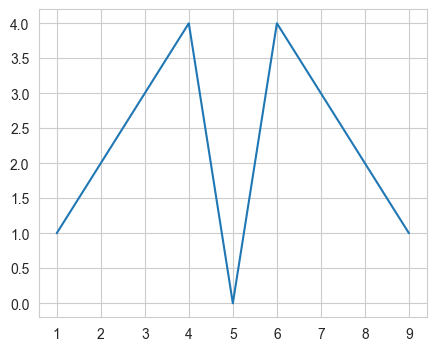

In [14]:
# Example:

x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x, y)

## Bar Chart:

<BarContainer object of 9 artists>

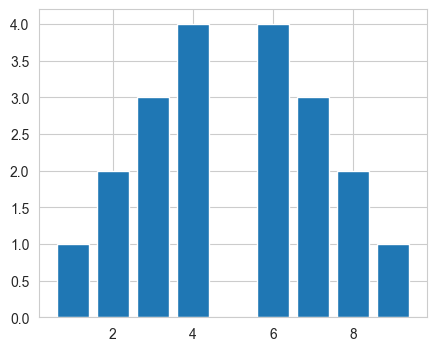

In [15]:
# Bar chart on same sample dataset.
plt.bar(x, y)

## Pie Chart:

([<matplotlib.patches.Wedge at 0x1f74ee2d050>,
 [Text(1.0511300845578104, 0.32423069770996493, ''),
  Text(0.4018751039768062, 1.0239611324672588, ''),
  Text(-0.9910657898026471, 0.47727204012266977, ''),
  Text(0.0822032521067005, -1.096924165721169, ''),
  Text(1.0877139352529008, -0.1639463176062465, '')])

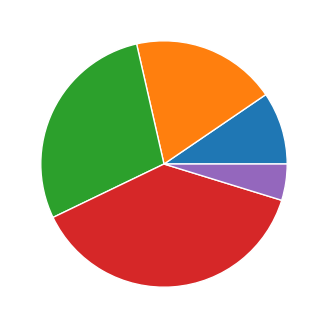

In [16]:
# Pie chart with a sample dataset.
x = [1, 2, 3, 4, 0.5]

plt.pie(x)
#plt.show()

<Axes: >

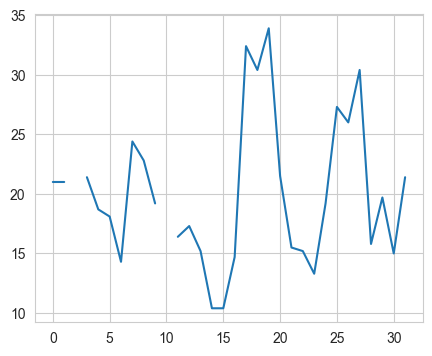

In [17]:
# Drawing a plot for the above data CARS dataset.
mpg = cars['mpg']
mpg.plot()

<Axes: >

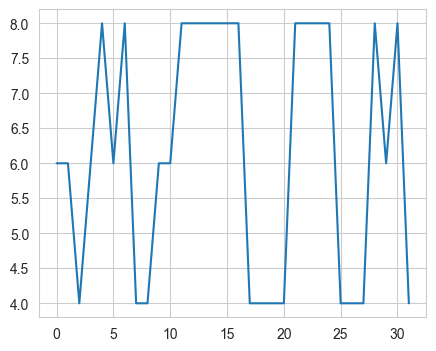

In [18]:
cars['cyl'].plot()

<Axes: >

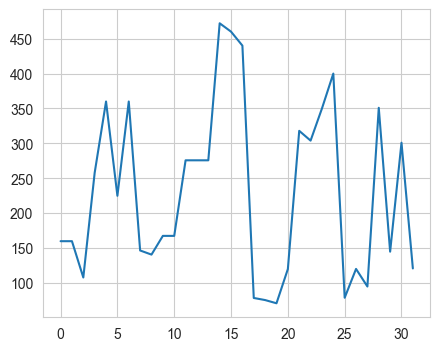

In [19]:
cars['disp'].plot()

<Axes: >

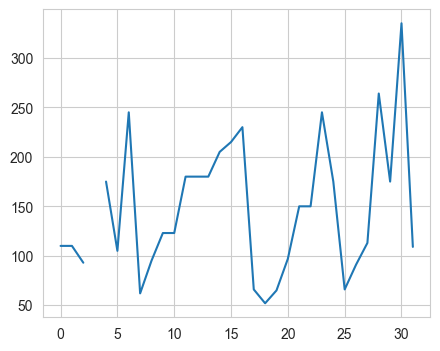

In [20]:
cars['hp'].plot()

<Axes: >

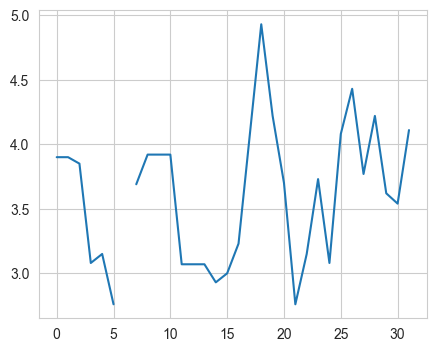

In [21]:
cars['drat'].plot()

<Axes: >

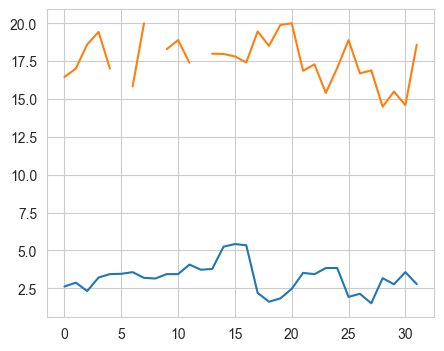

In [22]:
cars['wt'].plot()
cars['qsec'].plot()

<Axes: >

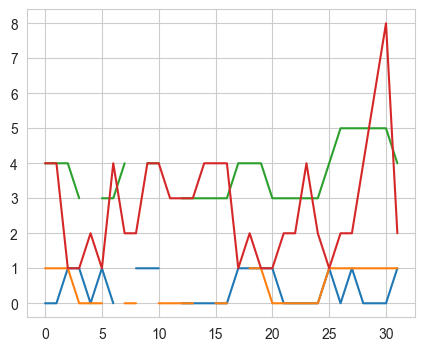

In [23]:
cars['v_Shape'].plot()
cars['am'].plot()
cars['gear'].plot()
cars['carb'].plot()

<BarContainer object of 32 artists>

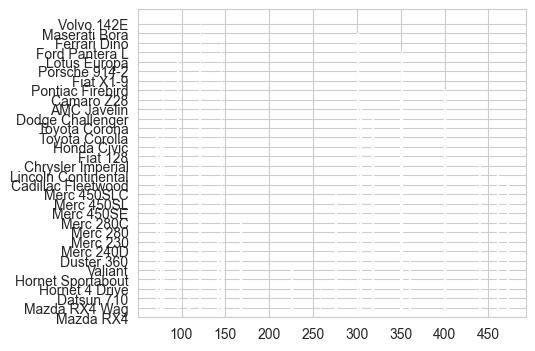

In [27]:
#plt.bar(cars['vichle_names'], cars['disp'])
#plt.xticks(rotation=90)
plt.bar(cars['disp'], cars['vichle_names'])